<a href="https://colab.research.google.com/github/asyahdin/Introduction-to-Python/blob/main/Regression_First_Project_July2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Predicting the Value of CO2 Emissionn***


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###

#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

### 1- Businuess Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.



### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-22 03:46:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-07-22 03:46:50 (2.79 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [12]:
ndf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
ndf.corr() #perbezaan numerical collumns (method1)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


### 6- Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [9]:
#method 2

df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

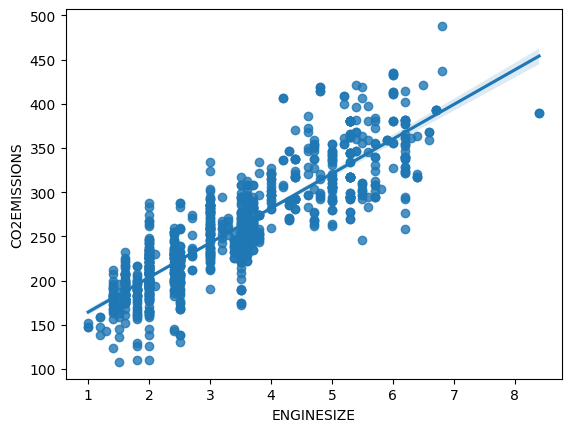

In [13]:
#plot

from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df) #postive corr

<function matplotlib.pyplot.show(close=None, block=None)>

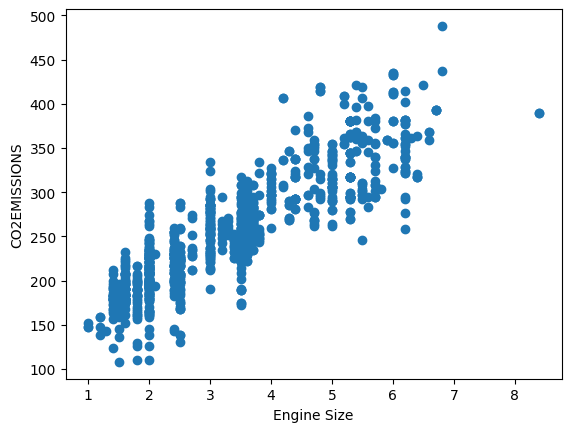

In [15]:
plt.scatter(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.xlabel('Engine Size')
plt.ylabel('CO2EMISSIONS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

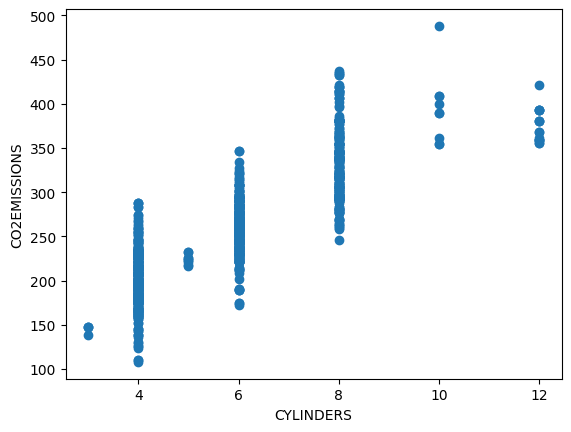

In [16]:
plt.scatter(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

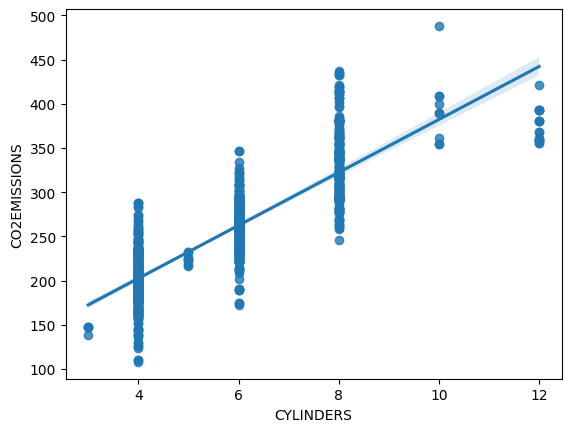

In [17]:
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df) #postive corr

<function matplotlib.pyplot.show(close=None, block=None)>

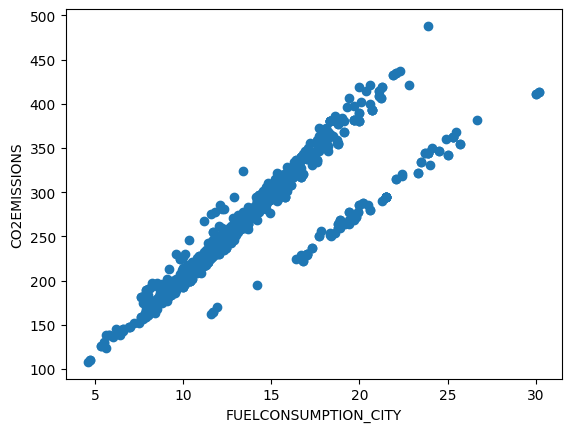

In [19]:
plt.scatter(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

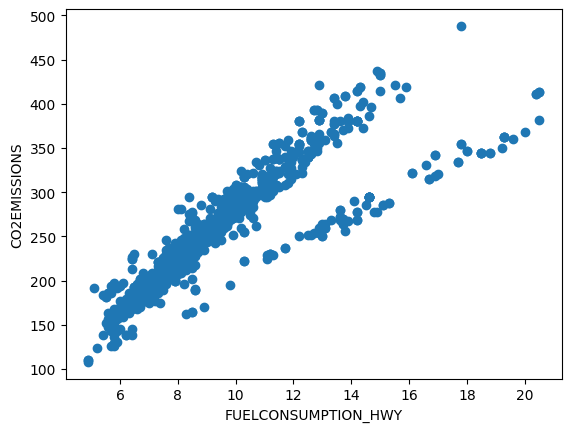

In [20]:
plt.scatter(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

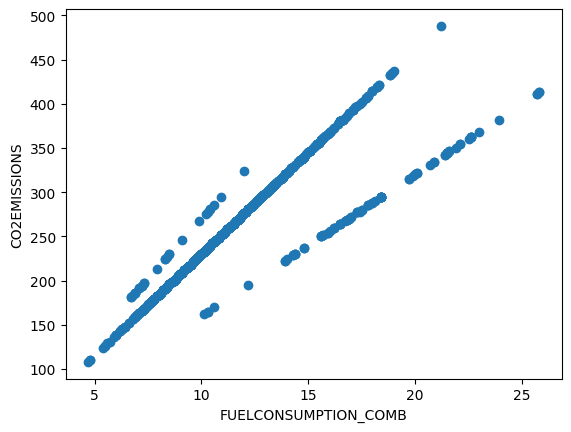

In [21]:
plt.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

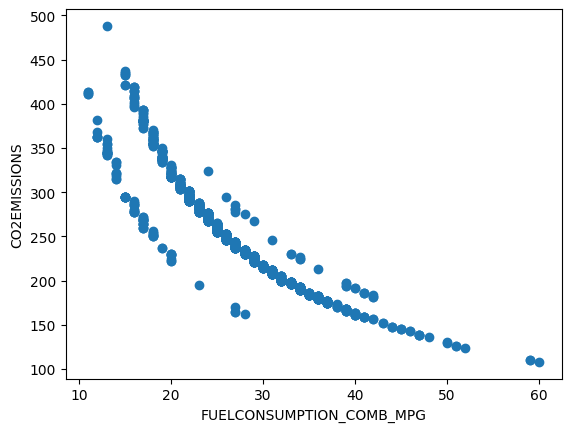

In [22]:
plt.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', data=df) #IT'S NON-LINEAR
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function:

In [44]:
#DIVIDE datasets into train and test

import numpy as np

msk = np.random.rand(len(df)) < 0.8 #msk check length of datasets and find lower of datasets under variables
train = df[msk] #takes 80% of datasets
test = df[~msk] #takes 20% of datasets

Train and Test Datasets distribution


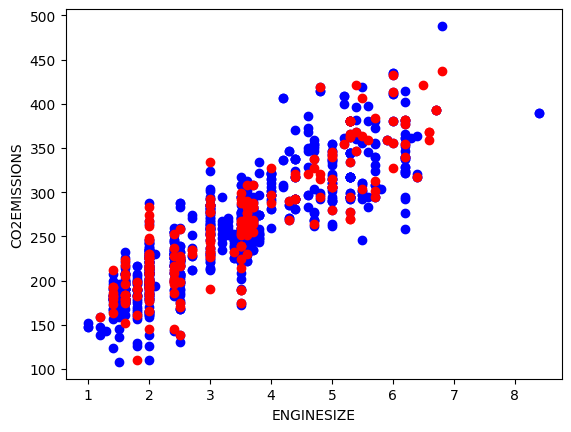

In [45]:
#SHOW Train/test of datasets

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')


plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

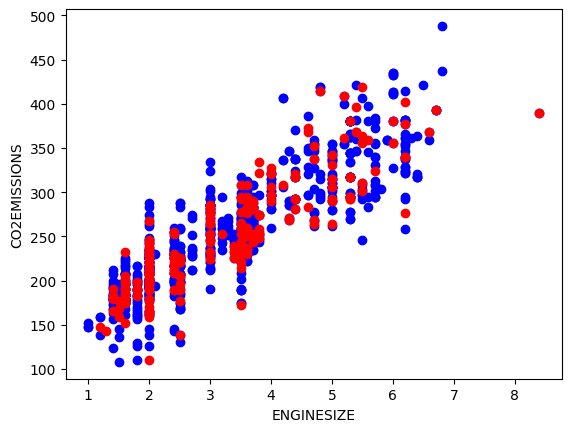

In [43]:
#SHOW Train/test of datasets

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')


plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

### 7-Modeling

In [25]:

from sklearn import linear_model
regr = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr.fit (train_x, train_y)

LinearRegression()

In [47]:
print ('The value of the slop is:', regr.coef_)
print ('The value of the interceptis', regr.intercept_)

The value of the slop is: [[39.18223443]]
The value of the interceptis [125.28197218]


Text(0, 0.5, 'Emission')

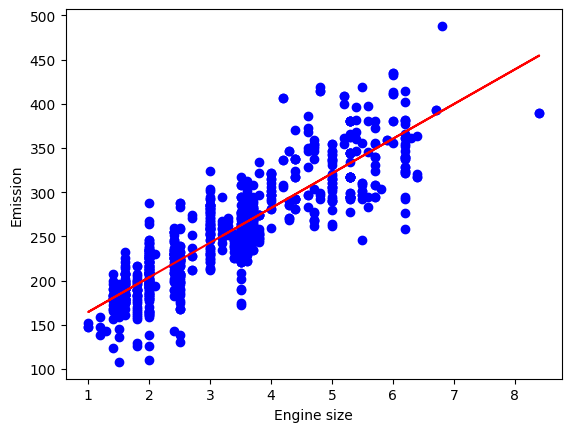

In [48]:
#best fit line by the algorithms

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [34]:
#method 1

x = 2.4

y = regr.intercept_ + regr.coef_ * x

y

array([[219.3193348]])

In [38]:
#or method 2 ikut kategori

x = int(df['ENGINESIZE'].sample())

y = regr.intercept_ + regr.coef_ * x

y

<ipython-input-38-87ea7f476e90>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(df['ENGINESIZE'].sample())


array([[164.46420661]])

### 8-Evaluation

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

#to calc missing val

print('The R2 is:', r2_score(test_y, test_y))
print ('The MSE is:', np.mean((test_y_- test_y)**2))

The R2 is: 1.0
The MSE is: 911.1793196898195


In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)


print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 is:  76.37
The MSE is:  911.1793196898195


**Trying to check the other correlated features**

In [49]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [50]:
#'FUELCONSUMPTION_COMB_MPG' vs 'CO2EMISSIONS'

regr1 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr1.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  81.49
The MSE is:  85794.16
The MAE is:  1974 2


In [51]:
#'CYLINDERS' vs 'CO2EMISSIONS'

regr1 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr1.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  70.28
The MSE is:  137706.2
The MAE is:  2814 2


In [52]:
#'FUELCONSUMPTION_CITY' vs 'CO2EMISSIONS'

regr1 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr1.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  81.5
The MSE is:  85748.41
The MAE is:  2063 2


**Multiple Linear Regression**

In [53]:
df.columns #to call

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [54]:
#Multiple Linear Regression
#'FUELCONSUMPTION_CITY' vs 'CO2EMISSIONS'

regr1 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr1.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  81.54
The MSE is:  85542.88
The MAE is:  2053 2


In [ ]:
plt.subplot(1,2,1)

plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")

plt.subplot(1,2,2)

plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

plt.tight_layout()
plt.show()

In [ ]:
#best fit line by the algorithms

plt.scatter(train.ENGINESIZE,  train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [61]:
#Multiple Linear Regression
#'FUELCONSUMPTION_CITY' vs 'CO2EMISSIONS'

regr1 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr1.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr1.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  78.25
The MSE is:  100805.77
The MAE is:  2377 2


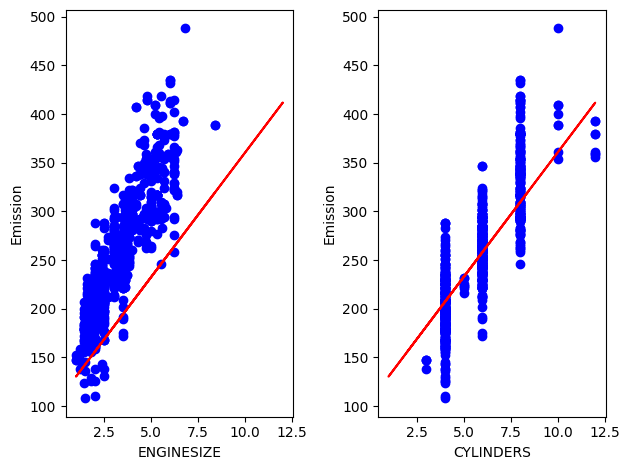

In [64]:
#multiple graf

plt.subplot(1,2,1)

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

plt.subplot(1,2,2)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

plt.tight_layout()
plt.show()

In [65]:
#Mtriplet multiple Linear Regression
#'FUELCONSUMPTION_CITY' vs 'CO2EMISSIONS vs 'FUELCONSUMPTION_COMB_MPG'

regr3 = linear_model.LinearRegression() #call from linear model to linear regression

#to fix from training set
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


#training/learning to fix x and y
regr3.fit (train_x, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr3.predict(test_x)

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print ('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y)) ))*100), 2)

The R2 is:  88.69
The MSE is:  52397.72
The MAE is:  1498 2


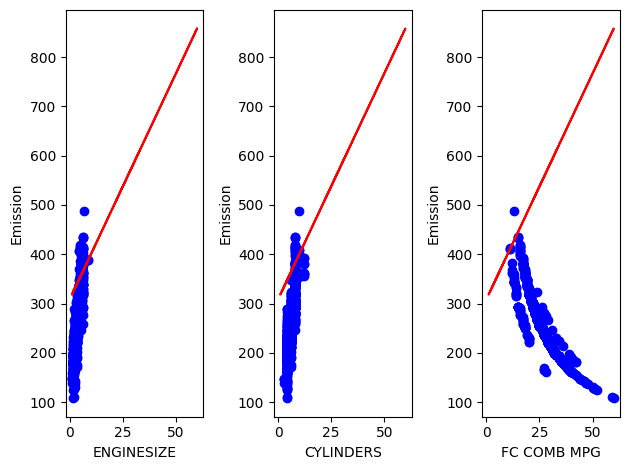

In [66]:
plt.subplot(1, 3, 1)

plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr3.coef_[0][0]*train_x + regr3.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

plt.subplot(1, 3, 2)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr3.coef_[0][0]*train_x + regr3.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

plt.subplot(1, 3, 3)

plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr3.coef_[0][0]*train_x + regr3.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FC COMB MPG")
plt.ylabel("Emission")

plt.tight_layout()
plt.show()